In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('USAID_Anticorruption_Projects_Database.csv')

In [5]:
df.drop(['proj_res','rfp_rftop','final_res','mind_eval','final_eval','audit','interim_rep',
            'addl_docs','addl_info'],axis=1,inplace=True)

In [6]:
df.head()

,uuid,region,country,proj_nm,st_date,end_date,awd_amount,awd_value,implementer,sector,intervention,intervention_type,proj_desc,corruption,stability
0,1,South and Central Asia (SCA),Afghanistan,Assistance for Afghanistan's Anti-Corruption A...,2010,2013,e) $25 M-$50 M,26642989,Management Systems International (MSI),"Independent Agencies, Civil Society","Corruption Prevention, Public Awareness","Awareness, Accountability",The five components of this program seek to ta...,High Corruption,Unstable
1,2,South and Central Asia (SCA),Afghanistan,Rule of Law Stabilization Program - Formal Com...,2010,2012,e) $25 M-$50 M,33700000,TetraTech ARD,Rule of Law,"Court Administration, Professional Legal Educa...","Transparency, Awareness",The overall goal of the program was to support...,Very High Corruption,Very Unstable
2,3,South and Central Asia (SCA),Afghanistan,Afghanistan Rule of Law Stabilization Project ...,2011,2012,c) $5 M-$10 M,10000000,"Checchi and Company Consulting, Inc.",Rule of Law,Access to Justice,"Awareness, Accountability",The project focused on strengthening and impro...,Very High Corruption,Very Unstable
3,4,South and Central Asia (SCA),Afghanistan,Political Party Assessment,2012,2012,a) <$1 M,NaN,"Checchi and Company Consulting, Inc.",Elections and Political Processes,Assessment,Assessment,The Political Party Assessment team aimed to r...,Very High Corruption,Very Unstable
4,30,Europe and Eurasia (E&E),Albania,Justice Sector Strengthening Project (JuST),2010,2015,c) $5 M-$10 M,9012613,Chemonics,"Rule of Law, Civil Society","Legal/Institutional Strengthening/Reform, Cour...","Transparency, Accountability, Awareness",The Justice Sector Strengthening Project (JuST...,High Corruption,Unstable


In [7]:
#df['awd_amount'].value_counts().plot(kind='bar')

## Data pre-processing for textual variables

### 1. Lowercasing

In [8]:
df['proj_desc'] = df['proj_desc'].astype(str)

In [9]:
## Lowercase all descriptions
df['proj_desc'] = df['proj_desc'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2. Special characters

In [10]:
## remove punctuation
df['proj_desc'] = df['proj_desc'].str.replace('[^\w\s]','')

### 3. Stopwords

In [11]:
stop = stopwords.words('english')
df['proj_desc'] = df['proj_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### 4. Stemming

"This will help us in text classification to deal with the curse of dimensionality but to calculate the sentiment score this process is not useful."

In [12]:
st = PorterStemmer()
df['proj_desc'] = df['proj_desc'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

## Sentiment Score

In [13]:
## Define a function which can be applied to calculate the score for the whole dataset
 
def senti(x):
    return TextBlob(x).sentiment

In [14]:
df['senti_score'] = df['proj_desc'].apply(senti)

In [15]:
df.senti_score.head()

0    (-0.05133333333333333, 0.5746666666666667)
1                   (-0.06, 0.4666666666666667)
2                                    (0.0, 0.0)
3             (-0.028124999999999997, 0.421875)
4     (0.27499999999999997, 0.3416666666666667)
Name: senti_score, dtype: object

"As it can be observed there are two scores: the first score is sentiment polarity which tells if the sentiment is positive or negative and the second score is subjectivity score to tell how subjective is the text". The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [31]:
df2 = df[['senti_score']]

In [17]:
df2[['desc_polarity', 'desc_subjectivity']] = pd.DataFrame(df2['senti_score'].tolist()) #split senti_score to polarity and subjectivity

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df2.head()

,uuid,proj_desc,senti_score,desc_polarity,desc_subjectivity
0,1,five compon program seek take alreadi exist im...,"(-0.05133333333333333, 0.5746666666666667)",-0.051333,0.574667
1,2,overal goal program support rule law strategi ...,"(-0.06, 0.4666666666666667)",-0.060000,0.466667
2,3,project focus strengthen improv tradit disput ...,"(0.0, 0.0)",0.000000,0.000000
3,4,polit parti assess team aim review materi prod...,"(-0.028124999999999997, 0.421875)",-0.028125,0.421875
4,30,justic sector strengthen project promot court ...,"(0.27499999999999997, 0.3416666666666667)",0.275000,0.341667


In [19]:
df3 = df2[['uuid', 'proj_desc','desc_polarity','desc_subjectivity']]

In [20]:
df3.head()

,uuid,proj_desc,desc_polarity,desc_subjectivity
0,1,five compon program seek take alreadi exist im...,-0.051333,0.574667
1,2,overal goal program support rule law strategi ...,-0.060000,0.466667
2,3,project focus strengthen improv tradit disput ...,0.000000,0.000000
3,4,polit parti assess team aim review materi prod...,-0.028125,0.421875
4,30,justic sector strengthen project promot court ...,0.275000,0.341667


In [21]:
def label_polarity (row):
   if row['desc_polarity'] > 0 :
      return 'positive'
   elif row['desc_polarity'] == 0:
      return 'neutral'
   else: 
      return 'negative'

In [22]:
def label_subj (row):
   if row['desc_subjectivity'] > 0.5 :
      return 'subjective'
   else: 
      return 'objective'

In [23]:
df3['desc_polarity_label'] = df3.apply (lambda row: label_polarity(row), axis=1)

In [24]:
df3['desc_subjectivity_label'] = df3.apply (lambda row: label_subj(row), axis=1)

In [25]:
df3.head()

,uuid,proj_desc,desc_polarity,desc_subjectivity,desc_polarity_label,desc_subjectivity_label
0,1,five compon program seek take alreadi exist im...,-0.051333,0.574667,negative,subjective
1,2,overal goal program support rule law strategi ...,-0.060000,0.466667,negative,objective
2,3,project focus strengthen improv tradit disput ...,0.000000,0.000000,neutral,objective
3,4,polit parti assess team aim review materi prod...,-0.028125,0.421875,negative,objective
4,30,justic sector strengthen project promot court ...,0.275000,0.341667,positive,objective


In [26]:
df3.to_csv('proj_desc_sentiment_Jen1.csv') #export to csv

Text(0.5, 1.0, 'Distribution of sentiment polarity score - proj_desc')

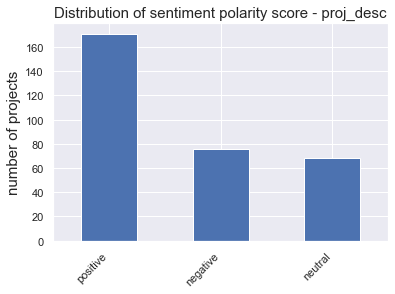

In [27]:
plot = df3['desc_polarity_label'].value_counts().plot(kind='bar')
plt.ylabel('number of projects', fontsize = 15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution of sentiment polarity score - proj_desc', fontsize = 15)

Text(0.5, 1.0, 'Distribution of sentiment subjectivity score - proj_desc')

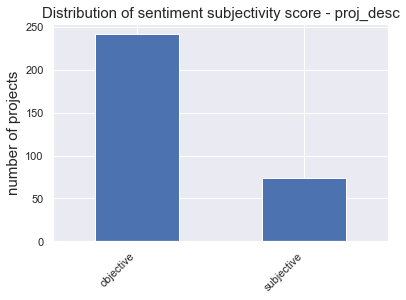

In [28]:
plot = df3['desc_subjectivity_label'].value_counts().plot(kind='bar')
plt.ylabel('number of projects', fontsize = 15)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution of sentiment subjectivity score - proj_desc', fontsize = 15)

Text(0.5, 1.0, 'Distribution of sentiment polarity score - proj_desc')

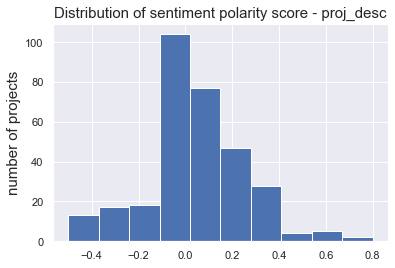

In [29]:
df3['desc_polarity'].hist() #distribution of polarity scores
plt.ylabel('number of projects', fontsize = 15)
plt.title('Distribution of sentiment polarity score - proj_desc', fontsize = 15)

Text(0.5, 1.0, 'Distribution of sentiment subjectivity score - proj_desc')

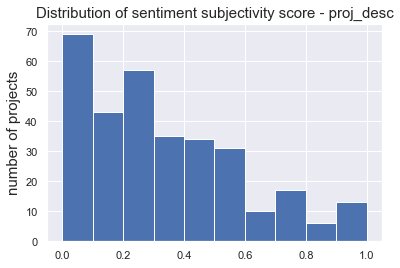

In [30]:
df3['desc_subjectivity'].hist() #distribution of subjectivity scores
plt.ylabel('number of projects', fontsize = 15)
plt.title('Distribution of sentiment subjectivity score - proj_desc', fontsize = 15)